In [1]:
import numpy as np # for data processing
import pandas as pd # for data processing
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting

In [2]:
data = pd.read_csv('D:/feps  fourth year curriculum/Social DS/labtop data/clean_data.csv')

In [3]:
data.head(5)

,brand,Price(EGP),Operating System Version,Display Resolution Type,Processor Speed(GHZ),Operating System,RAM Size(GB),Storage Type,Internal Memory,Screen Size(inch),...,Processor Version Number/Generation,Number of Cores,RAM Type,Processor Brand,External Graphics,HDMI Output,Number of USB Ports,SD Card Slot,Number of HDMI Ports,Processor Version
0,HP,19999,Windows 11 Home,Full HD,4.5,Windows,8,SSD,512 GB,15.6,...,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,No,1.0,Core i5-1155G7
1,HP,11999,Windows 11,HD,2.6,Windows,4,SSD,256 GB,15.6,...,3rd Gen,Octa Core,DDR4,AMD,Graphic Card,Yes,3,Yes,1.0,Ryzen 3 3250U
2,Lenovo,45600,Windows 11,Full HD,2.3,Windows,16,SSD,512 GB,15.6,...,12th Gen,10-Core,DDR4,Intel,Graphic Card,Yes,3,No,1.0,i7-12650H
3,HP,23999,Windows 11 Home,Full HD,4.5,Windows,16,SSD,512 GB,15.6,...,7th Gen,Octa Core,DDR4,AMD,Integrated,Yes,3,No,1.0,Ryzen 7 7730U
4,HP,24999,Windows 11,Full HD,3.5,Windows,8,SSD,512 GB,15.6,...,12th Gen,Deca core,SDRAM,Intel,Integrated,Yes,3,Yes,1.0,Core i7-1255u


# Regression Analysis

## Data Preprocessing 

In [4]:
Reg_data = data

In [5]:
Reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   brand                                285 non-null    object 
 1   Price(EGP)                           285 non-null    int64  
 2   Operating System Version             285 non-null    object 
 3   Display Resolution Type              285 non-null    object 
 4   Processor Speed(GHZ)                 285 non-null    float64
 5   Operating System                     285 non-null    object 
 6   RAM Size(GB)                         285 non-null    int64  
 7   Storage Type                         285 non-null    object 
 8   Internal Memory                      285 non-null    object 
 9   Screen Size(inch)                    285 non-null    float64
 10  Display Resolution                   285 non-null    object 
 11  Colour Name                     

In [6]:
# removing redundant & unnecessary variables

Reg_data.drop( ['Operating System Version' , 'Processor Version' , 'Processor Type'], axis = 1 , inplace = True)

In [7]:
Reg_data['RAM Size(GB)'] = Reg_data['RAM Size(GB)'].astype(str)

In [8]:
# splitting the Df into numerical columns & categorical columns

# Select the columns according to dtype
cat_col = Reg_data.select_dtypes(include=['object']).columns
num_col = Reg_data.select_dtypes(exclude=['object']).columns

# Split the datasets
cat_data = Reg_data[cat_col]
num_data = Reg_data[num_col]

In [9]:
cat_col

Index(['brand', 'Display Resolution Type', 'Operating System', 'RAM Size(GB)',
       'Storage Type', 'Internal Memory', 'Display Resolution', 'Colour Name',
       'Laptop Type', 'Processor Version Number/Generation', 'Number of Cores',
       'RAM Type', 'Processor Brand', 'External Graphics', 'HDMI Output',
       'SD Card Slot'],
      dtype='object')

In [10]:
num_col

Index(['Price(EGP)', 'Processor Speed(GHZ)', 'Screen Size(inch)',
       'Number of USB Ports', 'Number of HDMI Ports'],
      dtype='object')

In [11]:
# observing the values for each categorical variables

for var in cat_col:
    print(f"Value counts for {var}:")
    print(cat_data[var].value_counts())
    print("\n")

Value counts for brand:
brand
Lenovo       78
HP           60
DELL         54
Apple        36
Acer         30
ASUS         24
MSI           1
Fujitsu       1
Microsoft     1
Name: count, dtype: int64


Value counts for Display Resolution Type:
Display Resolution Type
Full HD    242
HD          31
QHD         12
Name: count, dtype: int64


Value counts for Operating System:
Operating System
Windows    157
DOS         74
macOS       36
Ubuntu      18
Name: count, dtype: int64


Value counts for RAM Size(GB):
RAM Size(GB)
8     140
16     73
4      72
Name: count, dtype: int64


Value counts for Storage Type:
Storage Type
SSD    231
HDD     54
Name: count, dtype: int64


Value counts for Internal Memory:
Internal Memory
512 GB    145
256 GB     80
1 TB       42
500 GB     12
128 GB      6
Name: count, dtype: int64


Value counts for Display Resolution:
Display Resolution
1080x1920    139
1920x1080     86
1366x768      42
2560x1440      6
3024x1964      6
1600x2560      6
Name: count, dtyp

In [12]:
# combining 512 & 500 in one category , same for 256 & 128

Reg_data['Internal Memory'] = Reg_data['Internal Memory'].replace({'512 GB': '500 GB', '500 GB':'500 GB'   , '256 GB':'<500GB'  , '128 GB':'<500GB' })


In [13]:
Reg_data['Display Resolution'] = Reg_data['Display Resolution'].replace({'1600x2560': '<1600x2560', '1080x1920':'<1600x2560' , 
                                                                         '1366x768':'<1600x2560' , '1920x1080':'>1920x1080', '2560x1440 ': '>1920x1080' , '3024x1964':'>1920x1080'
                                                                        })                                                       

In [14]:
Reg_data['Colour Name'] = Reg_data['Colour Name'].replace({'Black/Dark Shadow Grey' : 'Grey' , 'Onyx Grey':'Grey' , 
                                                           'Gray':'Grey'  ,  'Titan Grey':'Grey' , 'Pine Grey':'Grey' ,'Cloud Grey':'Grey' ,
                                                           'STORM GRAY':'Grey' , 'Carbon Gray':'Grey' , 'Blue':'Blue' , 'Quiet Blue':'Blue' , 'Abyss Blue':'Blue' , 
                                                           'Fog Blue':'Blue' , 'Platinum':'Blue' , 'Pure Silver':'Silver' , 'purple Silver':'Silver'  ,
                                                           'silver':'Silver'  , 'Carbon Black':'Black' , 'Jet Black':'Black' ,
                                                           'BLACK':'Black' ,  'Shale Black':'Black' , 'Midnight':'Blue' , 'Gold':'Gold' , 'black':'Black' , 
                                                          'Space Grey':'Grey'  , 'Storm Grey':'Grey'  ,'Iron Grey':'Grey'  })

In [15]:
Reg_data['Processor Version Number/Generation'] = Reg_data['Processor Version Number/Generation'].replace({
    '10th Gen':'10Gen+' , '11th Gen':'10Gen+' , '12th Gen':'10Gen+'  , '13th Gen':'10Gen+'  , '9th Gen':'9Gen-' ,
    '7th Gen':'9Gen-'   , '6th Gen':'9Gen-'  , '5th Gen':'9Gen-'   ,  '3rd Gen':'9Gen-' , 'Pentium N5030':'9Gen-'  ,'N3350':'9Gen-',
    'N5000':'9Gen-'   , 'AMD Ryzen 3-3250U':'Ryzen'    ,       'Ryzen 7-7730U':'Ryzen'
})

In [16]:
Reg_data['Number of Cores'] = Reg_data['Number of Cores'].replace({  
'10-Core':'10+' , '12-Core':'10+'  ,  '16-Core':'10+'  , 'Deca core':'10+'  , '14-Core':'10+'  ,  'Octa Core':'8-'  ,
    'Hexa Core':'8-'   , 'Quad Core':'8-'   , 'Dual Core':'8-'  
})

In [17]:
Reg_data['RAM Type'] = Reg_data['RAM Type'].replace({ 'LPDDR4X':'DDR4' ,  'LPDDR4':'DDR4'  , 'SDRAM':'DDR' 

})

In [18]:
Reg_data['External Graphics'] = Reg_data['External Graphics'].replace({ 
'Processor Graphics' : 'Integrated'
})

In [19]:
num_data.head()

,Price(EGP),Processor Speed(GHZ),Screen Size(inch),Number of USB Ports,Number of HDMI Ports
0,19999,4.5,15.6,3,1.0
1,11999,2.6,15.6,3,1.0
2,45600,2.3,15.6,3,1.0
3,23999,4.5,15.6,3,1.0
4,24999,3.5,15.6,3,1.0


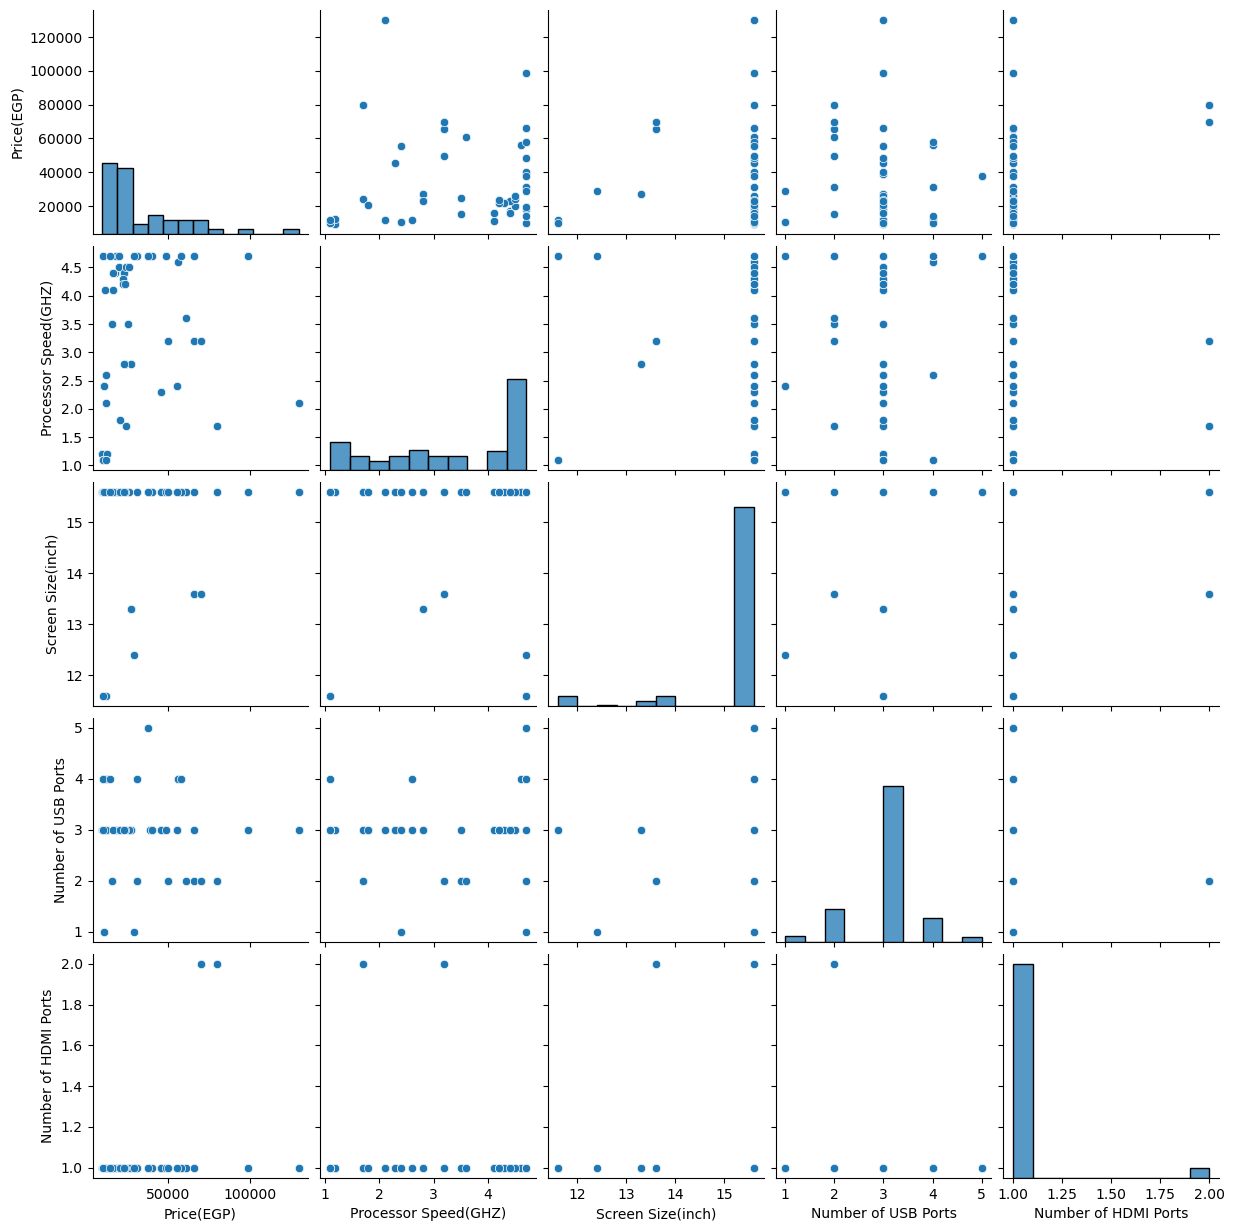

In [20]:
sns.pairplot(num_data)

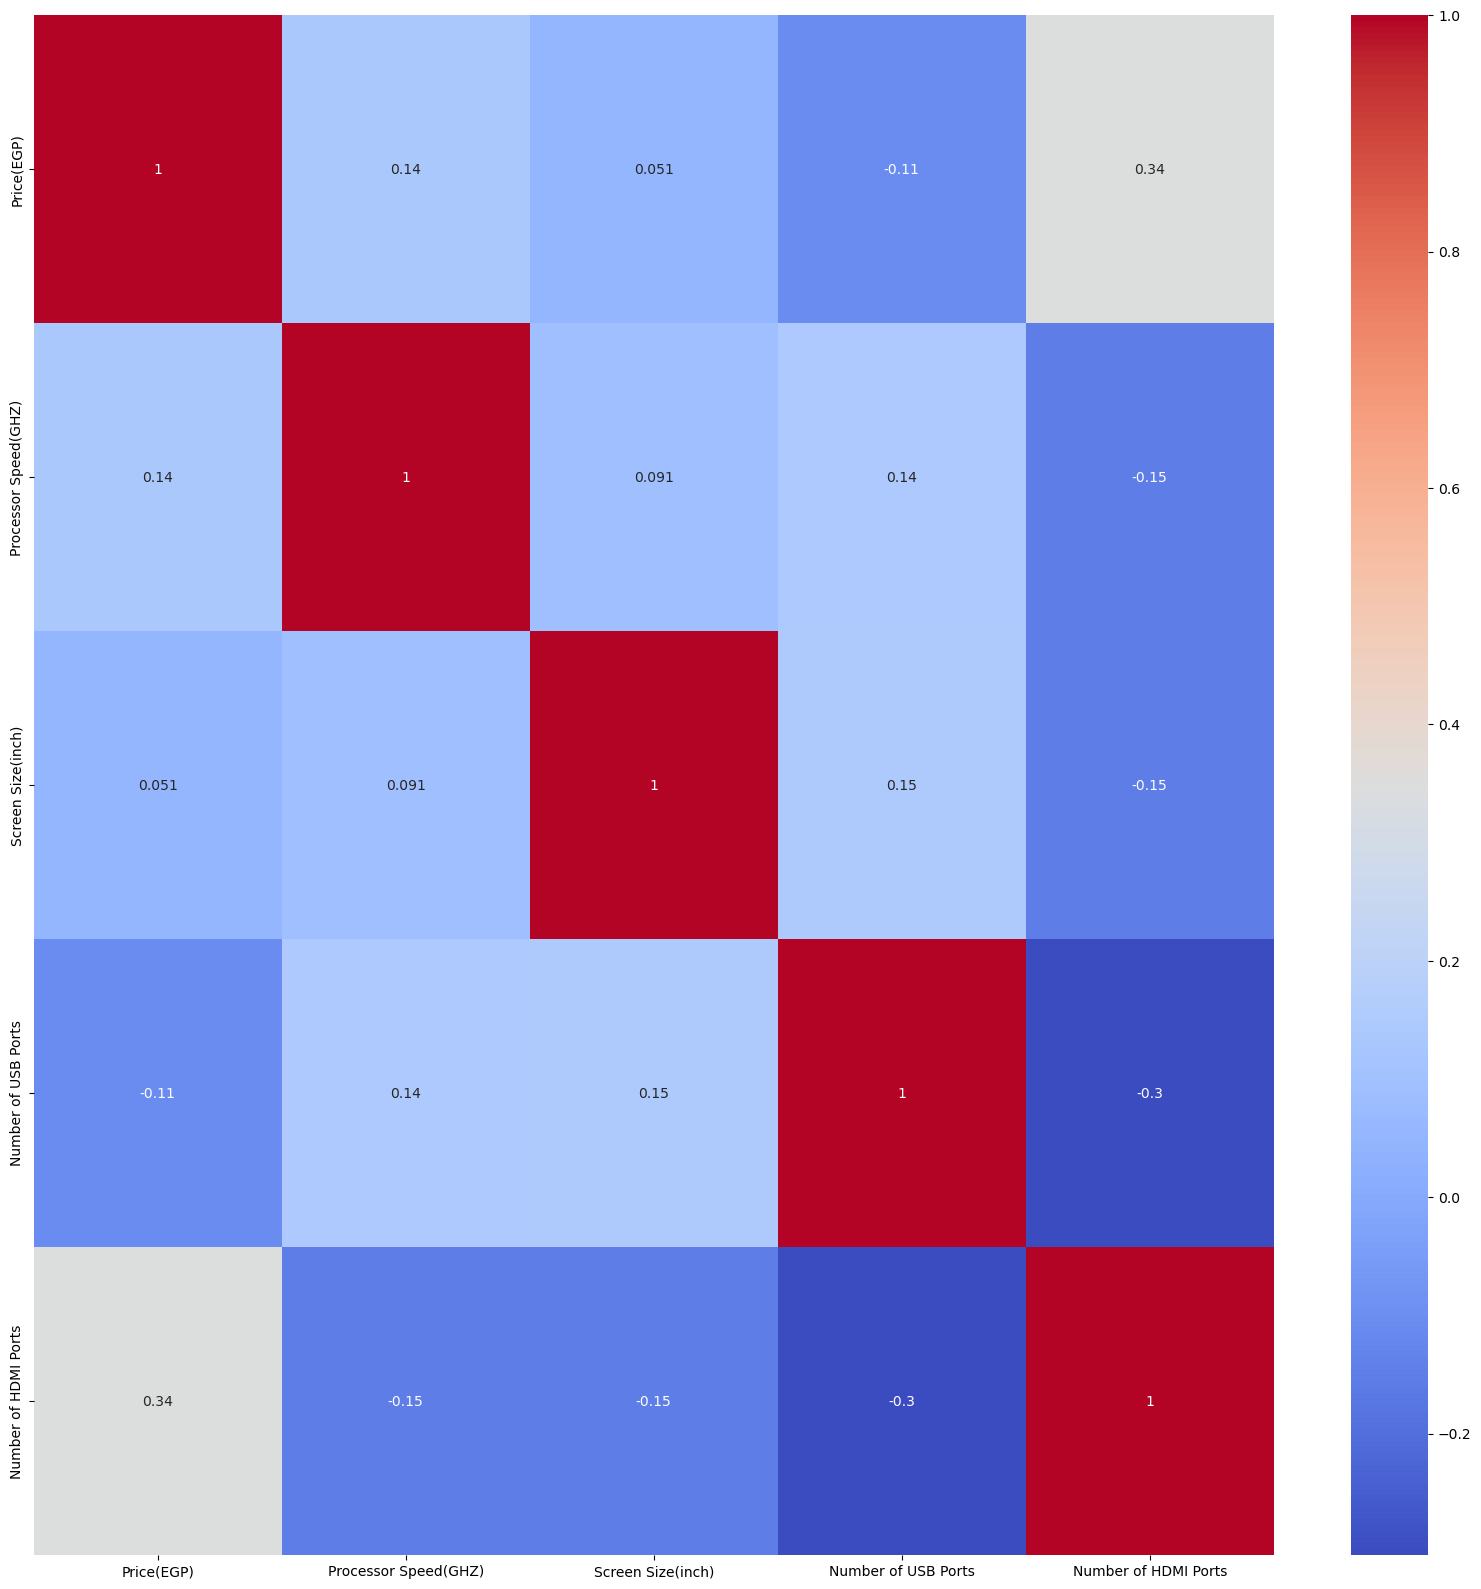

In [21]:
# Calculate correlation matrix
corr_matrix = num_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');

- `Processor Speed(GHZ)` , `Number of HDMIProts`  & `Number of USD Ports` are somewhat correlated with price variable ,hence i will only use them

## Get Dummy variables for categorical data

In [22]:
# Statistics package
import statsmodels.api as sm

# Machine learning packages
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


 - I will only use the important categorical features when fitting the model

In [23]:
imp_cat_variables = Reg_data[['brand' ,'Operating System', 'Processor Version Number/Generation' ,
                                  'Processor Brand' ,'RAM Type' ,'RAM Size(GB)' , 'Number of Cores']]

In [24]:
dummies = pd.get_dummies(Reg_data[['brand' ,'Operating System', 'Processor Version Number/Generation' ,
                                  'Processor Brand' ,'RAM Type' ,'RAM Size(GB)' , 'Number of Cores']], drop_first = True)
 

In [25]:
dummies.head()

# we have boolean values , we have to convert them to Zeros & ones

,brand_Acer,brand_Apple,brand_DELL,brand_Fujitsu,brand_HP,brand_Lenovo,brand_MSI,brand_Microsoft,Operating System_Ubuntu,Operating System_Windows,...,Processor Version Number/Generation_9Gen-,Processor Version Number/Generation_Apple laptop,Processor Version Number/Generation_Ryzen,Processor Brand_Apple,Processor Brand_Intel,RAM Type_DDR4,RAM Type_DDR5,RAM Size(GB)_4,RAM Size(GB)_8,Number of Cores_8-
0,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,True,False,False,True,True
1,False,False,False,False,True,False,False,False,False,True,...,True,False,False,False,False,True,False,True,False,True
2,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,True,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,True
4,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False


In [26]:
dummies = dummies.astype(int)

In [27]:
dummies.head()


,brand_Acer,brand_Apple,brand_DELL,brand_Fujitsu,brand_HP,brand_Lenovo,brand_MSI,brand_Microsoft,Operating System_Ubuntu,Operating System_Windows,...,Processor Version Number/Generation_9Gen-,Processor Version Number/Generation_Apple laptop,Processor Version Number/Generation_Ryzen,Processor Brand_Apple,Processor Brand_Intel,RAM Type_DDR4,RAM Type_DDR5,RAM Size(GB)_4,RAM Size(GB)_8,Number of Cores_8-
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
1,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
2,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [28]:
 # create another df that has dummy variables & quantitative variables

data1 = pd.concat([num_data, dummies], axis = 1)

In [29]:
data1.head()

,Price(EGP),Processor Speed(GHZ),Screen Size(inch),Number of USB Ports,Number of HDMI Ports,brand_Acer,brand_Apple,brand_DELL,brand_Fujitsu,brand_HP,...,Processor Version Number/Generation_9Gen-,Processor Version Number/Generation_Apple laptop,Processor Version Number/Generation_Ryzen,Processor Brand_Apple,Processor Brand_Intel,RAM Type_DDR4,RAM Type_DDR5,RAM Size(GB)_4,RAM Size(GB)_8,Number of Cores_8-
0,19999,4.5,15.6,3,1.0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,1
1,11999,2.6,15.6,3,1.0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,1
2,45600,2.3,15.6,3,1.0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,23999,4.5,15.6,3,1.0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,24999,3.5,15.6,3,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [30]:
data1.columns

Index(['Price(EGP)', 'Processor Speed(GHZ)', 'Screen Size(inch)',
       'Number of USB Ports', 'Number of HDMI Ports', 'brand_Acer',
       'brand_Apple', 'brand_DELL', 'brand_Fujitsu', 'brand_HP',
       'brand_Lenovo', 'brand_MSI', 'brand_Microsoft',
       'Operating System_Ubuntu', 'Operating System_Windows',
       'Operating System_macOS', 'Processor Version Number/Generation_9Gen-',
       'Processor Version Number/Generation_Apple laptop',
       'Processor Version Number/Generation_Ryzen', 'Processor Brand_Apple',
       'Processor Brand_Intel', 'RAM Type_DDR4', 'RAM Type_DDR5',
       'RAM Size(GB)_4', 'RAM Size(GB)_8', 'Number of Cores_8-'],
      dtype='object')

In [31]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(123)

# We divide the df into 70/30 ratio
df_train, df_test = train_test_split(data1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
X_train = df_train.drop('Price(EGP)', axis=1)
y_train = df_train['Price(EGP)']

In [33]:
X_train.columns

Index(['Processor Speed(GHZ)', 'Screen Size(inch)', 'Number of USB Ports',
       'Number of HDMI Ports', 'brand_Acer', 'brand_Apple', 'brand_DELL',
       'brand_Fujitsu', 'brand_HP', 'brand_Lenovo', 'brand_MSI',
       'brand_Microsoft', 'Operating System_Ubuntu',
       'Operating System_Windows', 'Operating System_macOS',
       'Processor Version Number/Generation_9Gen-',
       'Processor Version Number/Generation_Apple laptop',
       'Processor Version Number/Generation_Ryzen', 'Processor Brand_Apple',
       'Processor Brand_Intel', 'RAM Type_DDR4', 'RAM Type_DDR5',
       'RAM Size(GB)_4', 'RAM Size(GB)_8', 'Number of Cores_8-'],
      dtype='object')

In [34]:
# applying forward feature extraction to select the best quantitative variables

quan_variables = ['Processor Speed(GHZ)', 'Screen Size(inch)', 'Number of USB Ports',
       'Number of HDMI Ports']

X_train_numeric = X_train[quan_variables]

# Define the linear regression model
lr = LinearRegression()

# Define the stepwise feature selector
sfs = SFS(lr, 
           k_features='best', 
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error',
           cv=5)

# Fit the stepwise feature selector
sfs = sfs.fit(X_train_numeric, y_train)

# Print the selected features
print('Selected features:', sfs.k_feature_names_)

Selected features: ('Processor Speed(GHZ)', 'Number of HDMI Ports')


In [35]:
X_train_numeric

,Processor Speed(GHZ),Screen Size(inch),Number of USB Ports,Number of HDMI Ports
168,4.7,15.6,4,1.0
62,2.1,15.6,3,1.0
132,4.7,15.6,3,1.0
80,4.7,15.6,3,1.0
125,2.8,13.3,3,1.0
...,...,...,...,...
66,3.2,13.6,2,1.0
53,4.4,15.6,3,1.0
79,2.4,15.6,3,1.0
280,4.4,15.6,3,1.0


- Therefore we will only use`Processor Speed(GHZ)` & `Number of HDMI Ports` in model fitting

In [36]:
# Fit the regression model

X_train = df_train.drop(['Price(EGP)','Screen Size(inch)','Number of USB Ports'], axis=1)

# Add a constant to the predictors
X_train = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Price(EGP)   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     90.32
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           4.21e-81
Time:                        17:20:59   Log-Likelihood:                -2061.5
No. Observations:                 199   AIC:                             4163.
Df Residuals:                     179   BIC:                             4229.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [37]:
# assessing the model on the test set

X_test = df_test.drop(['Price(EGP)','Screen Size(inch)','Number of USB Ports'], axis=1)
y_test = df_test['Price(EGP)']

# Add a constant to the predictors
X_test = sm.add_constant(X_test)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate and print the R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 64712160.27960355
R-squared: 0.9093939670992623


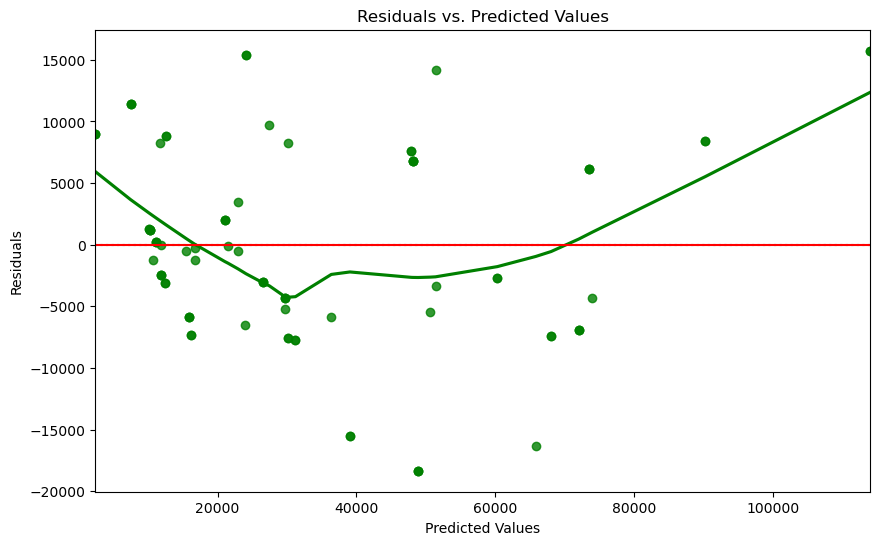

In [38]:
# residuals plot 

residuals = y_test - y_pred

# create a residuals plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='g')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

- The points are randomly scattered around Zero line which shows that we have no auto correlation between price values

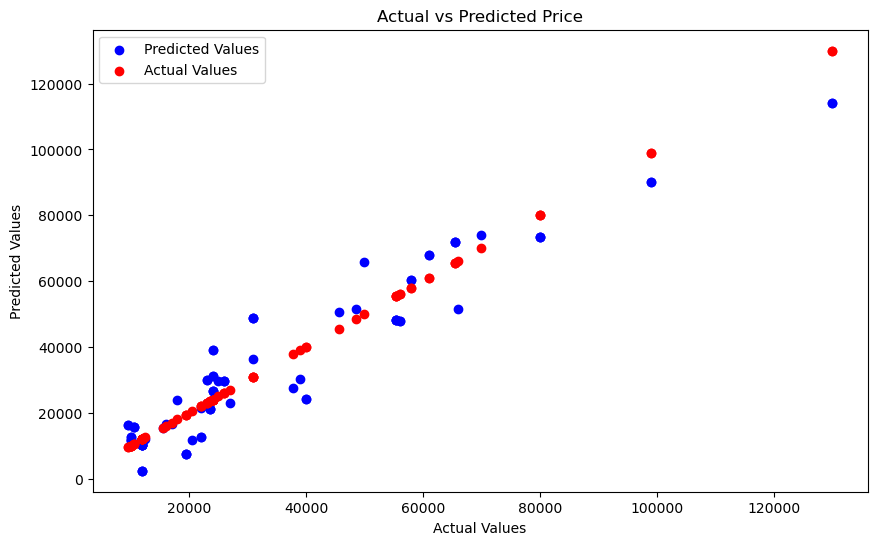

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', label='Predicted Values')  # Blue for predicted values
plt.scatter(y_test, y_test, c='red', label='Actual Values')  # Red for actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Price')
plt.legend()  # Show legend for clarity
plt.show()

# KNN

In [40]:
from sklearn.neighbors import KNeighborsRegressor #Import KNN regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score



In [41]:
print(X_test.columns)
print(X_train.columns)
print('Number of columns in X_test is :' , len(X_test.columns))
print('Number of columns in X_train is :' , len(X_train.columns))

Index(['const', 'Processor Speed(GHZ)', 'Number of HDMI Ports', 'brand_Acer',
       'brand_Apple', 'brand_DELL', 'brand_Fujitsu', 'brand_HP',
       'brand_Lenovo', 'brand_MSI', 'brand_Microsoft',
       'Operating System_Ubuntu', 'Operating System_Windows',
       'Operating System_macOS', 'Processor Version Number/Generation_9Gen-',
       'Processor Version Number/Generation_Apple laptop',
       'Processor Version Number/Generation_Ryzen', 'Processor Brand_Apple',
       'Processor Brand_Intel', 'RAM Type_DDR4', 'RAM Type_DDR5',
       'RAM Size(GB)_4', 'RAM Size(GB)_8', 'Number of Cores_8-'],
      dtype='object')
Index(['const', 'Processor Speed(GHZ)', 'Number of HDMI Ports', 'brand_Acer',
       'brand_Apple', 'brand_DELL', 'brand_Fujitsu', 'brand_HP',
       'brand_Lenovo', 'brand_MSI', 'brand_Microsoft',
       'Operating System_Ubuntu', 'Operating System_Windows',
       'Operating System_macOS', 'Processor Version Number/Generation_9Gen-',
       'Processor Version Number/G

In [42]:
# remove the added constant column in X_test & X_train after assessing the accuracy 
X_test.drop('const' ,axis = 1, inplace = True)
X_train.drop('const' ,axis = 1, inplace = True)

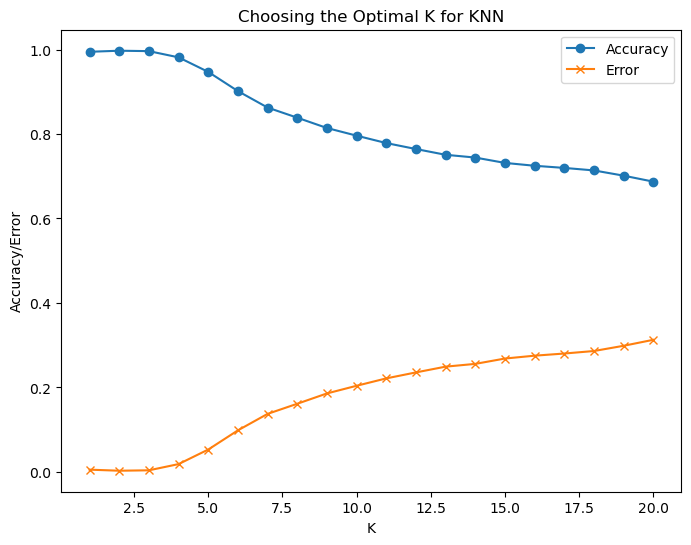

In [46]:
# using a loop to determine the best K (number of neighbors)

accuracy = []
error = []

# Try different K values
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy.append(knn.score(X_test, y_test))
    error.append(1 - accuracy[-1])

# Plot accuracy/error vs. K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), accuracy, marker='o', label='Accuracy')
plt.plot(range(1, 21), error, marker='x', label='Error')
plt.xlabel('K')
plt.ylabel('Accuracy/Error')
plt.title('Choosing the Optimal K for KNN')
plt.legend()
plt.show()

 - Seems like K = 1 , 2 & 3 has the highest accracy rates 

In [47]:

KNN = KNeighborsRegressor(n_neighbors=2) # by n_neighbors, we determine the chosen number of neighbours
KNN_Model = KNN.fit(X_train, y_train) #train the model on the training dataset
y_pred = KNN_Model.predict(X_test)

##################
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('MAE = ', mae.round(4))
print('RMSE = ', rmse.round(4))
print('Accuracy = ', KNN.score(X_test, y_test))

MAE =  261.6163
RMSE =  1404.3433
Accuracy =  0.9972386731212178


# Decision Tree


In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
print(X_test.columns)
print(X_train.columns)
print('Number of columns in X_test is :' , len(X_test.columns))
print('Number of columns in X_train is :' , len(X_train.columns))

Index(['Processor Speed(GHZ)', 'Number of HDMI Ports', 'brand_Acer',
       'brand_Apple', 'brand_DELL', 'brand_Fujitsu', 'brand_HP',
       'brand_Lenovo', 'brand_MSI', 'brand_Microsoft',
       'Operating System_Ubuntu', 'Operating System_Windows',
       'Operating System_macOS', 'Processor Version Number/Generation_9Gen-',
       'Processor Version Number/Generation_Apple laptop',
       'Processor Version Number/Generation_Ryzen', 'Processor Brand_Apple',
       'Processor Brand_Intel', 'RAM Type_DDR4', 'RAM Type_DDR5',
       'RAM Size(GB)_4', 'RAM Size(GB)_8', 'Number of Cores_8-'],
      dtype='object')
Index(['Processor Speed(GHZ)', 'Number of HDMI Ports', 'brand_Acer',
       'brand_Apple', 'brand_DELL', 'brand_Fujitsu', 'brand_HP',
       'brand_Lenovo', 'brand_MSI', 'brand_Microsoft',
       'Operating System_Ubuntu', 'Operating System_Windows',
       'Operating System_macOS', 'Processor Version Number/Generation_9Gen-',
       'Processor Version Number/Generation_Apple la

In [50]:
# to determine the best depth of the tree

accuracy_scores = []

# Try different max_depth values
for depth in range(1, 21):
    # Create a Decision Tree Regressor
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy (you can use other metrics as well)
    accuracy = 1 - np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE-based accuracy
    accuracy_scores.append(accuracy)

# Find the best max_depth
best_max_depth = np.argmax(accuracy_scores) + 1  # Add 1 because of 0-based indexing

print(f"Best max_depth for predicting price: {best_max_depth}")


Best max_depth for predicting price: 9


In [52]:
accuracy_scores

[-17470.37731753148,
 -12354.734224655074,
 -8845.124077478527,
 -6562.757803617597,
 -4866.288620918549,
 -1546.1692545224118,
 -1433.6951424052584,
 -1408.344673340795,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035]

In [54]:
max([-17470.37731753148,
 -12354.734224655074,
 -8845.124077478527,
 -6562.757803617597,
 -4866.288620918549,
 -1546.1692545224118,
 -1433.6951424052584,
 -1408.344673340795,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035,
 -1403.8607499479035])

-1403.8607499479035